# Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn import metrics


import warnings
from sklearn.exceptions import ConvergenceWarning

# Load Data

In [4]:
train_df = pd.read_json('./Data/train.json')
test_df = pd.read_json('./Data/test.json')
bangkok = pd.read_csv('./Data/bangkok_district.csv')

#### train data : 14,271 rows x 23 columns including `price`

In [6]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


#### test data : 2,500 rows x 22 columns w/o `price`

In [8]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


# Know your data 

In [10]:
train_df.describe()
# found zero bathroom (check)
# found floor area 1 Error in data

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.427100e+04,10509.000000,14228.000000,14236.000000,14271.000000,8093.000000,4917.000000,14271.000000,14271.000000,14271.000000,6009.000000,13885.000000,14271.000000,14271.000000,1.427100e+04
mean,1.062614e+07,712.655438,1.880728,1.618292,79.867283,11.322995,242.963596,13.762814,100.565017,0.956415,14.049426,9.002161,10.447060,1422.737440,4.044124e+06
std,8.030103e+05,554.558340,1.092817,0.872875,69.701181,9.064835,3083.223006,0.092787,0.089575,1.085255,6.496828,5.348001,6.950903,917.737592,2.179909e+06
min,1.025114e+06,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05
25%,1.064588e+07,318.000000,1.000000,1.000000,32.000000,4.000000,80.000000,13.705177,100.512628,0.000000,8.000000,5.000000,4.000000,0.000000,2.250000e+06
50%,1.086984e+07,554.000000,1.000000,1.000000,47.000000,8.000000,116.000000,13.753742,100.569721,1.000000,17.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097710e+07,945.000000,3.000000,2.000000,112.000000,17.000000,212.000000,13.837514,100.608786,2.000000,20.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


In [11]:
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [12]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [13]:
test_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
dtype: object

In [14]:
train_df['property_type'].unique()
#According to the unique type train_df should not have zero, null values 

array(['Condo', 'Detached House', 'Townhouse'], dtype=object)

In [15]:
train_df['baths'].isna().sum()

35

In [16]:
#Drop the 'nan' values from bath column (35 Rows) Train
train_df = train_df[(train_df['baths'] != 0) & (train_df['baths'].notna())]

In [17]:
train_df['baths'].isna().sum()

0

In [18]:
test_df['baths'].isna().sum()

10

In [19]:
test_df['bedrooms'].isna().sum()

10

In [20]:
test_df['baths'] = test_df['baths'].fillna(0)

In [21]:
test_df['bedrooms'] = test_df['bedrooms'].fillna(0)

In [22]:
#Drop the 'floor area' <= 1 from df (14212 left)
train_df = train_df[(train_df['floor_area']  > 1 ) & (train_df['floor_area'].notna())]

In [23]:
test_df = test_df[(test_df['floor_area']  > 1 ) & (test_df['floor_area'].notna())]

In [24]:
train_df.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.421200e+04,10474.000000,14202.000000,14212.000000,14212.000000,8075.000000,4894.000000,14212.000000,14212.000000,14212.000000,5972.000000,13828.000000,14212.000000,14212.000000,1.421200e+04
mean,1.062658e+07,712.245369,1.882200,1.620743,79.871236,11.338824,243.106661,13.762841,100.564930,0.957923,14.041025,9.009474,10.454968,1423.117436,4.046572e+06
std,8.037563e+05,554.492544,1.093152,0.871354,69.698937,9.068158,3090.419323,0.092765,0.089482,1.085561,6.500724,5.353449,6.953327,917.568038,2.180180e+06
min,1.025114e+06,1.000000,1.000000,1.000000,18.000000,1.000000,16.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05
25%,1.064629e+07,318.000000,1.000000,1.000000,32.000000,4.000000,80.000000,13.705210,100.512681,0.000000,8.000000,5.000000,4.000000,0.000000,2.254500e+06
50%,1.087068e+07,554.000000,1.000000,1.000000,47.000000,8.000000,116.000000,13.753874,100.569721,1.000000,17.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097724e+07,945.000000,3.000000,2.000000,112.000000,17.000000,212.000000,13.837432,100.608712,2.000000,20.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


In [25]:
#Drop 'NaN' in bedrooms 10 row =14202
train_df = train_df.dropna(subset=['bedrooms'])

In [26]:
# found zero in year_built = 10034 it is not good to drop .. let change to impute by mean
train_df['year_built'].unique()

array([2011, 2012, 2017,    0, 2014, 2010, 2004, 2018, 2015, 2023, 2016,
       2019, 1994, 2013, 2022, 2009, 2021, 2020, 2007, 1993, 2008, 2006,
       2002, 2005, 1995, 1998, 1996, 2000, 2003, 1999, 1992, 1997, 1991,
       2001, 1988])

In [27]:
# found zero in year_built 
test_df['year_built'].unique()

array([   0, 2020, 2015, 2013, 2012, 2010, 2016, 2014, 2019, 2007, 1996,
       2017, 2018, 2011, 2009, 2008, 2022, 2006, 2021, 2005, 2023, 2004,
       1994, 1997, 2002, 2001, 1999, 1993, 1995, 2003, 1998])

In [28]:
train_df['province'].unique()

array(['Bangkok', 'Nonthaburi', 'Samut Prakan'], dtype=object)

In [29]:
test_df['province'].unique()

array(['Samut Prakan', 'Bangkok', 'Nonthaburi'], dtype=object)

In [30]:
train_df['district'].unique()

array(['Watthana', 'Khlong Toei', 'Bang Kruai', 'Mueang Nonthaburi',
       'Bang Rak', 'Pak Kret', 'Sai Mai', 'Pathum Wan', 'Chatuchak',
       'Mueang Samut Prakan', 'Prawet', 'Bang Bua Thong', 'Huai Khwang',
       'Phra Khanong', 'Suan Luang', 'Bangkok Yai', 'Bueng Kum',
       'Bang Kapi', 'Nong Khaem', 'Bang Phli', 'Khan Na Yao',
       'Phra Samut Jadee', 'Bang Yai', 'Phaya Thai', 'Bang Sao Thong',
       'Saphan Sung', 'Din Daeng', 'Don Mueang', 'Ratchathewi',
       'Thon Buri', 'Bang Phlat', 'Min Buri', 'Lak Si', 'Khlong Sam Wa',
       'Yan Nawa', 'Sai Noi', 'Bang Na', 'Bang Khen', 'Phra Pradaeng',
       'Lat Phrao', 'Bang Sue', 'Khlong San', 'Bangkok Noi',
       'Phasi Charoen', 'Chom Thong', 'Lat Krabang', 'Wang Thonglang',
       'Bang Khun Thian', 'Nong Chok', 'Bang Kho Laem', 'Bang Bo',
       'Sathon', 'Rat Burana', 'Thung Khru', 'Bang Khae',
       'Thawi Watthana', 'Bang Bon', 'Taling Chan'], dtype=object)

In [31]:
test_df['district'].unique()

array(['Bang Phli', 'Nong Khaem', 'Huai Khwang', 'Khlong Toei', 'Lak Si',
       'Chom Thong', 'Mueang Samut Prakan', 'Bang Sue', 'Din Daeng',
       'Watthana', 'Mueang Nonthaburi', 'Sai Mai', 'Khlong Sam Wa',
       'Ratchathewi', 'Sathon', 'Bang Yai', 'Bang Khen', 'Bang Rak',
       'Phaya Thai', 'Bang Na', 'Bang Kapi', 'Lat Phrao', 'Bangkok Yai',
       'Wang Thonglang', 'Lat Krabang', 'Phra Khanong', 'Thung Khru',
       'Pathum Wan', 'Prawet', 'Taling Chan', 'Thon Buri', 'Chatuchak',
       'Bueng Kum', 'Bang Kruai', 'Bang Khae', 'Pak Kret', 'Yan Nawa',
       'Saphan Sung', 'Suan Luang', 'Bang Khun Thian', 'Bang Bua Thong',
       'Bangkok Noi', 'Phra Samut Jadee', 'Sai Noi', 'Min Buri',
       'Phasi Charoen', 'Khan Na Yao', 'Khlong San', 'Phra Pradaeng',
       'Bang Sao Thong', 'Bang Phlat', 'Rat Burana', 'Bang Bon',
       'Thawi Watthana', 'Don Mueang', 'Bang Bo', 'Bang Kho Laem',
       'Nong Chok'], dtype=object)

In [32]:
bangkok.columns

Index(['province', 'province_th', 'district', 'district_th', 'subdistrict',
       'subdistrict_th'],
      dtype='object')

In [33]:
#looking for lists of lists in the train dataset 
for col in train_df.columns:
    # Check if any non-null value is a list of lists
    if train_df[col].dropna().apply(lambda x: isinstance(x, list) and len(x) > 0 and isinstance(x[0], list)).any():
        print(f"{col} contains lists of lists")

nearby_station_distance contains lists of lists


In [34]:
#looking for lists of lists in the test dataset 
for col in test_df.columns:
    # Check if any non-null value is a list of lists
    if test_df[col].dropna().apply(lambda x: isinstance(x, list) and len(x) > 0 and isinstance(x[0], list)).any():
        print(f"{col} contains lists of lists")

nearby_station_distance contains lists of lists


In [35]:
# counts the number of unique station in Train
train_df['nearby_station_distance'].dropna().apply(lambda x: tuple(map(tuple, x))).nunique()

1144

In [36]:
# counts the number of unique status in Test
test_df['nearby_station_distance'].dropna().apply(lambda x: tuple(map(tuple, x))).nunique()

600

In [37]:
# list is a built-in Python type/function, thus the trailing underscore option (list_) for the parameter name 
def get_bts_list(list_, keyword):
    if list_ is None: # Handles the None values by returning 0
        return 0
    # Converts strings to uppercase (could likely do lowercase as well) 
    # for case-insensitive comparison
    keyword = keyword.upper()
    return 1 if any(keyword in str(item[0]).upper() for item in list_) else 0

# has_bts columns is boolean to check whether near BTS or not.
train_df['has_bts'] = train_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'bts'))
train_df['has_bts'].value_counts()

train_df[train_df['has_bts'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,has_bts
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000,1
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000,1
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000,1
5,10879034,Bangkok,Bang Rak,Si Phraya,เจริญกรุง 30,Condo,211.0,1.0,1.0,54,...,3,"[[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taks...",NaN,14.0,20,2014,December,"[CCTV, Fitness corner, 24 hours security, Sky ...",8549000,1
9,10827236,Bangkok,Pathum Wan,Lumphini,55 Langsuan Road,Condo,247.0,1.0,1.0,61,...,3,"[[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 5...",NaN,12.0,19,2004,March,"[Car Park, Covered car park, CCTV, Fitness cor...",3500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14258,11033518,Bangkok,Huai Khwang,Bang Kapi,Asoke-Dindang Road,Condo,1642.0,1.0,1.0,35,...,3,"[[E4 Asok BTS, 40], [BL21 Phetchaburi MRT, 150...",NaN,8.0,20,2018,June,"[Covered car park, Clubhouse, CCTV, Fitness co...",4900000,1
14259,10810091,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,43,...,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",5670000,1
14260,10986437,Bangkok,Ratchathewi,Thanon Phetchaburi,111 ถนนเพชรบุรี,Condo,880.0,1.0,1.0,35,...,3,"[[N1 Ratchathewi BTS, 190], [N2 Phaya Thai BTS...",NaN,15.0,20,2023,None,"[Adult Fitness Stations, Car Park, Community G...",6700000,1
14261,10912293,Bangkok,Watthana,Khlong Tan Nuea,Eight Thonglor Building 88/36,Condo,196.0,1.0,1.0,55,...,1,"[[E6 Thong Lo BTS, 870]]",20.0,20.0,20,2009,December,"[CCTV, 24 hours security]",8990000,1


In [38]:
# has_bts columns is boolean to check whether near BTS or not.
test_df['has_bts'] = test_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'bts'))
test_df['has_bts'].value_counts()

test_df[test_df['has_bts'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,has_bts
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",1
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",1
7,2796113,Samut Prakan,Mueang Samut Prakan,Pak Nam,111 Sukhumvit Road,Condo,468.0,2.0,2.0,64,...,100.596428,2,"[[E19 Pak Nam BTS, 340], [E18 Royal Thai Naval...",20.0,6.0,3,2016,December,"[Covered car park, CCTV, Fitness corner, Laund...",1
18,9663197,Bangkok,Ratchathewi,Thanon Phetchaburi,Petchburi Road,Condo,580.0,1.0,1.0,60,...,100.532905,3,"[[N1 Ratchathewi BTS, 160], [N2 Phaya Thai BTS...",NaN,20.0,20,2007,July,"[Covered car park, CCTV, Fitness corner, Sauna...",1
25,10897827,Bangkok,Bang Khen,Anusawari,1/15 พหลโยธิน,Townhouse,NaN,2.0,2.0,100,...,100.598407,2,"[[N18 Phahon Yothin 59 BTS, 440], [N17 Wat Phr...",20.0,11.0,9,0,None,"[Covered car park, Utilities Center]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,10915910,Samut Prakan,Mueang Samut Prakan,Thepharak,สุขุมวิท สุขุมวิท 115,Condo,202.0,1.0,1.0,27,...,100.593864,1,"[[E16 Pu Chao BTS, 270]]",NaN,5.0,5,2013,August,"[Covered car park, CCTV, Fitness corner, 24 ho...",1
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar...",1
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna...",1
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho...",1


In [39]:
# This should prevent series/columns/data from being truncated with ellipses in the output.
pd.set_option('display.max_colwidth', 500)

In [40]:
train_df['nearby_station_distance'].apply(lambda x: len(x) if x is not None else 0).value_counts().sort_index()

nearby_station_distance
0    6996
1    2483
2    3042
3    1681
Name: count, dtype: int64

In [41]:
import ast

# Value Errors due to .any()/.all() ambiguity and None Type issues be gone!!!
def parse_nearby_station_distance(value):
    # try/except should allow the code to handle various errors gracefully 
    # instead of just erroring out
    try:
        # The `.isinstance()` function returns True if the specified object 
        # is of the specified type, otherwise False.
        # If the value is a string (specified type), attempt to parse it as a list
        if isinstance(value, str):
            # `ast.literal_eval()` method safely evaluates strings containing 
            # Python literals such as lists, dicts, etc. 
            return ast.literal_eval(value)
        # If the value is already a list, return it as is
        elif isinstance(value, list):
            return value
        # If the value is None or NaN, return an empty list
        else: 
            return []
    except (ValueError, SyntaxError, TypeError):
        # In case of failure to parse in the try block, return an empty list
        return []

nearby_stations_df = train_df['nearby_station_distance'].apply(parse_nearby_station_distance)

def filter_bts_stations(stations):
    # Again, the `.isinstance()` function returns True if the specified object is of
    # the specified type, such as string in the following line, otherwise it returns False.
    # Checking/knowing the data types in detail is often key to code running properly.
    return [station for station in stations if isinstance(station[0], str) and 'bts' in station[0].lower()]

filtered_nearby_stations = nearby_stations_df.apply(filter_bts_stations)

# Refactor later to be programmatic. 
# Looping through a range of station counts should make this block of code cleaner
train_df['bts_station_one'] = filtered_nearby_stations.apply(lambda x: x[0][0] if len(x) > 0 else 0)
train_df['distance_one'] = filtered_nearby_stations.apply(lambda x: x[0][1] if len(x) > 0 else 0)
train_df['bts_station_two'] = filtered_nearby_stations.apply(lambda x: x[1][0] if len(x) > 1 else 0)
train_df['distance_two'] = filtered_nearby_stations.apply(lambda x: x[1][1] if len(x) > 1 else 0)
train_df['bts_station_three'] = filtered_nearby_stations.apply(lambda x: x[2][0] if len(x) > 2 else 0)
train_df['distance_three'] = filtered_nearby_stations.apply(lambda x: x[2][1] if len(x) > 2 else 0)

train_df[['nearby_station_distance', 'bts_station_one', 'distance_one', 
          'bts_station_two', 'distance_two', 'bts_station_three', 'distance_three']].head(10)

,nearby_station_distance,bts_station_one,distance_one,bts_station_two,distance_two,bts_station_three,distance_three
0,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",E7 Ekkamai BTS,270,E6 Thong Lo BTS,800,0,0
1,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi MRT, 850], [E4 Asok BTS, 900]]",E4 Asok BTS,900,0,0,0,0
2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Sirikit National Convention Centre MRT, 770]]",E5 Phrom Phong BTS,650,0,0,0,0
3,None,0,0,0,0,0,0
4,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",0,0,0,0,0,0
5,"[[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taksin BTS, 860], [S5 Surasak BTS, 960]]",G2 Charoen Nakhon BTS,820,S6 Saphan Taksin BTS,860,S5 Surasak BTS,960
6,None,0,0,0,0,0,0
7,None,0,0,0,0,0,0
8,None,0,0,0,0,0,0
9,"[[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 570], [E2 Ploen Chit BTS, 700]]",E1 Chit Lom BTS,490,S1 Rachadamri BTS,570,E2 Ploen Chit BTS,700


In [42]:
#count all bts station to support analyst
all_bts_stations = pd.concat([train_df['bts_station_one'], train_df['bts_station_two'], train_df['bts_station_three']])
all_bts_stations.value_counts().head(15)

0                      35426
E9 On Nut BTS            426
E4 Asok BTS              383
E6 Thong Lo BTS          349
E8 Phra Khanong BTS      311
E12 Udom Suk BTS         291
E5 Phrom Phong BTS       287
E7 Ekkamai BTS           284
E11 Punnawithi BTS       279
E14 Bearing BTS          255
N7 Saphan Kwai BTS       239
N6 Sena Ruam BTS         233
N2 Phaya Thai BTS        223
E15 Samrong BTS          199
E10 Bang Chak BTS        192
Name: count, dtype: int64

In [43]:
# has_mrt columns is boolean to check whether near Mrt or not.
train_df['has_mrt'] = train_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'mrt'))
train_df['has_mrt'].value_counts()

train_df[train_df['has_mrt'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,facilities,price,has_bts,bts_station_one,distance_one,bts_station_two,distance_two,bts_station_three,distance_three,has_mrt
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,"[CCTV, Fitness corner, 24 hours security, Swimming pool]",5900000,1,E4 Asok BTS,900,0,0,0,0,1
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,"[Car Park, Clubhouse, Community Garden, CCTV, Fitness corner, 24 hours security, Swimming pool]",6290000,1,E5 Phrom Phong BTS,650,0,0,0,0,1
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,"[Covered car park, 24 hours security]",2390000,0,0,0,0,0,0,0,1
14,10754391,Bangkok,Chatuchak,Chom Phon,. ซอยลาดพร้าว 7 แขวงจอมพล เขตจตุจักร กทม.,Condo,97.0,1.0,1.0,40,...,"[Covered car park, Club, Clubhouse, CCTV, Fitness corner, Library, Pavillion, 24 hours security, Sky Lounge, Swimming pool]",4390000,1,N9 Ha Yaek Lat Phrao BTS,920,0,0,0,0,1
15,10561994,Bangkok,Huai Khwang,Huai Khwang,ถนน ประชาอุทิศ,Condo,875.0,2.0,1.0,60,...,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",3650000,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,10891432,Bangkok,Din Daeng,Din Daeng,Sutthisarn Winitchai Road,Condo,270.0,1.0,1.0,36,...,"[Car Park, Covered car park, CCTV, Fitness corner, Gymnasium room, Lift lobby, Sauna, 24 hours security]",3200000,0,0,0,0,0,0,0,1
14258,11033518,Bangkok,Huai Khwang,Bang Kapi,Asoke-Dindang Road,Condo,1642.0,1.0,1.0,35,...,"[Covered car park, Clubhouse, CCTV, Fitness corner, Pavillion, 24 hours security, Sky Lounge, Swimming pool]",4900000,1,E4 Asok BTS,40,0,0,0,0,1
14262,11001883,Nonthaburi,Bang Yai,Sao Thong Hin,Sao Thong Hin,Detached House,NaN,2.0,2.0,144,...,[],2990000,0,0,0,0,0,0,0,1
14265,10846899,Bangkok,Din Daeng,Din Daeng,ดินแดง,Condo,537.0,1.0,1.0,33,...,"[CCTV, Fitness corner, 24 hours security, Swimming pool]",3260000,0,0,0,0,0,0,0,1


In [44]:
test_df['has_mrt'] = test_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'mrt'))
test_df['has_mrt'].value_counts()

test_df[test_df['has_mrt'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,has_bts,has_mrt
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780], [A6 Makkasan Airport Link, 780]]",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",1,1
8,10713056,Bangkok,Bang Sue,Bang Sue,Pracharat Sai 2 Road,Condo,1724.0,1.0,1.0,36,...,2,"[[BL09 Bang Pho MRT, 480], [BL10/PP16 Tao Poon MRT, 530]]",NaN,6.0,5,2014,January,"[Car Park, Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",0,1
9,10978982,Bangkok,Din Daeng,Din Daeng,Soi Vibhavadi Rangsit 16,Condo,560.0,1.0,1.0,40,...,2,"[[BL16 Ratchadaphisek MRT, 630], [BL17 Sutthisan MRT, 920]]",NaN,13.0,12,2019,January,"[BBQ pits, Covered car park, Clubhouse, CCTV, Fitness corner, Gymnasium room, Library, 24 hours security, Steam bath, Swimming pool]",0,1
12,10708676,Bangkok,Huai Khwang,Sam Sen Nok,ซอยศุภฤกษ์ ถนนลาดพร้าว 48 แขวงสามเสนนอก เขตห้วยขวาง กทม.,Condo,133.0,1.0,1.0,28,...,1,"[[BL17 Sutthisan MRT, 820]]",NaN,6.0,10,2016,July,"[Covered car park, Club, Clubhouse, CCTV, Fitness corner, Pavillion, 24 hours security, Swimming pool]",0,1
23,9964531,Nonthaburi,Bang Yai,Sao Thong Hin,Rattanathibet,Townhouse,844.0,2.0,2.0,100,...,2,"[[PP03 Sam Yaek Bang Yai MRT, 570], [PP02 Talad Bang Yai MRT, 870]]",NaN,20.0,20,2019,October,"[CCTV, 24 hours security]",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,10691915,Nonthaburi,Mueang Nonthaburi,Talat Khwan,ฺBangkok-Nonthaburi Road,Condo,646.0,1.0,1.0,34,...,2,"[[PP13 Yaek Tiwanon MRT, 430], [PP12 Ministry of Public Health MRT, 820]]",NaN,3.0,5,2015,March,"[Car Park, Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",0,1
2485,10998660,Bangkok,Watthana,Khlong Toei Nuea,Asok Montri Rd,Condo,213.0,1.0,1.0,50,...,3,"[[BL22 Sukhumvit MRT, 550], [BL21 Phetchaburi MRT, 560], [E4 Asok BTS, 680]]",NaN,10.0,20,2013,January,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",1,1
2487,10986769,Nonthaburi,Mueang Nonthaburi,Bang Khen,689 Prachachuen,Condo,1705.0,1.0,1.0,44,...,2,"[[PP15 Bang Son MRT, 400], [RW02 SRT Bang Son, 580]]",NaN,5.0,5,2017,January,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",0,1
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, 960]]",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Garden, CCTV, Fitness corner, Jacuzzi, Library, Mini-Mart, Sauna, 24 hours security, Steam bath, Swimming pool]",1,1


In [45]:
nearby_stations_df = train_df['nearby_station_distance'].apply(parse_nearby_station_distance)

def filter_mrt_stations(stations):

    return [station for station in stations if isinstance(station[0], str) and 'mrt' in station[0].lower()]

filtered_nearby_stations = nearby_stations_df.apply(filter_mrt_stations)

# Refactor later to be programmatic. 
# Looping through a range of station counts should make this block of code cleaner
train_df['mrt_station_one'] = filtered_nearby_stations.apply(lambda x: x[0][0] if len(x) > 0 else 0)
train_df['mrt_distance_one'] = filtered_nearby_stations.apply(lambda x: x[0][1] if len(x) > 0 else 0)
train_df['mrt_station_two'] = filtered_nearby_stations.apply(lambda x: x[1][0] if len(x) > 1 else 0)
train_df['mrt_distance_two'] = filtered_nearby_stations.apply(lambda x: x[1][1] if len(x) > 1 else 0)
train_df['mrt_station_three'] = filtered_nearby_stations.apply(lambda x: x[2][0] if len(x) > 2 else 0)
train_df['mrt_distance_three'] = filtered_nearby_stations.apply(lambda x: x[2][1] if len(x) > 2 else 0)

train_df[['nearby_station_distance', 'mrt_station_one', 'mrt_distance_one', 
          'mrt_distance_one', 'mrt_distance_two', 'mrt_station_three', 'mrt_distance_three']].head(10)

,nearby_station_distance,mrt_station_one,mrt_distance_one,mrt_distance_one,mrt_distance_two,mrt_station_three,mrt_distance_three
0,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",0,0,0,0,0,0
1,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi MRT, 850], [E4 Asok BTS, 900]]",BL22 Sukhumvit MRT,720,720,850,0,0
2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Sirikit National Convention Centre MRT, 770]]",BL23 Queen Sirikit National Convention Centre MRT,770,770,0,0,0
3,None,0,0,0,0,0,0
4,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",PP09 Yaek Nonthaburi 1 MRT,10,10,0,0,0
5,"[[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taksin BTS, 860], [S5 Surasak BTS, 960]]",0,0,0,0,0,0
6,None,0,0,0,0,0,0
7,None,0,0,0,0,0,0
8,None,0,0,0,0,0,0
9,"[[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 570], [E2 Ploen Chit BTS, 700]]",0,0,0,0,0,0


In [46]:
#count all mrt station to support analyst
all_mrt_stations = pd.concat([train_df['mrt_station_one'], train_df['mrt_station_two'], train_df['mrt_station_three']])
all_mrt_stations.value_counts().head(15) 

0                                     38077
BL20 Phra Ram 9 MRT                     348
BL18 Huai Khwang MRT                    242
BL21 Phetchaburi MRT                    235
PP09 Yaek Nonthaburi 1 MRT              226
BL15 Lat Phrao MRT                      224
PP10 Bang Krasor MRT                    196
BL16 Ratchadaphisek MRT                 193
BL14 Phahon Yothin MRT                  183
BL12 Kamphaeng Phet MRT                 172
BL22 Sukhumvit MRT                      172
PP12 Ministry of Public Health MRT      171
PP13 Yaek Tiwanon MRT                   153
PP11 Nonthaburi Civic Center MRT        146
BL17 Sutthisan MRT                      146
Name: count, dtype: int64

In [47]:
# has_ap columns is boolean to check whether near Airport Link or not.

train_df['has_ap'] = train_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'airport'))
train_df['has_ap'].value_counts()

train_df[train_df['has_ap'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,bts_station_three,distance_three,has_mrt,mrt_station_one,mrt_distance_one,mrt_station_two,mrt_distance_two,mrt_station_three,mrt_distance_three,has_ap
17,10906912,Bangkok,Suan Luang,Suan Luang,Ramkhamhaeng Road,Condo,1003.0,1.0,1.0,23,...,0,0,0,0,0,0,0,0,0,1
45,10762041,Bangkok,Huai Khwang,Huai Khwang,"195 Rama 9 Road, Soi 5",Condo,1911.0,2.0,2.0,58,...,0,0,1,BL20 Phra Ram 9 MRT,390,0,0,0,0,1
57,10715206,Bangkok,Din Daeng,Din Daeng,624 Asoke-Dindaeng Road,Condo,543.0,1.0,1.0,34,...,0,0,1,BL20 Phra Ram 9 MRT,590,0,0,0,0,1
61,10981364,Bangkok,Ratchathewi,Makkasan,1088 Phetchaburi Road,Condo,352.0,1.0,1.0,47,...,0,0,0,0,0,0,0,0,0,1
62,11028683,Bangkok,Suan Luang,Suan Luang,Srinakarin Road,Condo,1152.0,1.0,1.0,32,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14195,10893914,Bangkok,Suan Luang,Suan Luang,Srinakarin Road,Condo,558.0,1.0,1.0,30,...,0,0,0,0,0,0,0,0,0,1
14228,10611467,Bangkok,Watthana,Khlong Toei Nuea,"Soi Sukhumvit 13, Sukhumvit Road",Condo,145.0,1.0,1.0,29,...,0,0,1,BL21 Phetchaburi MRT,500,0,0,0,0,1
14233,10827400,Bangkok,Huai Khwang,Huai Khwang,"195 Rama 9 Road, Soi 5",Condo,1911.0,1.0,1.0,41,...,0,0,1,BL20 Phra Ram 9 MRT,390,0,0,0,0,1
14258,11033518,Bangkok,Huai Khwang,Bang Kapi,Asoke-Dindang Road,Condo,1642.0,1.0,1.0,35,...,0,0,1,BL21 Phetchaburi MRT,150,0,0,0,0,1


In [48]:
test_df['has_ap'] = test_df['nearby_station_distance'].apply(lambda x: get_bts_list(x, 'airport'))
test_df['has_ap'].value_counts()

test_df[test_df['has_ap'] == 1]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,has_bts,has_mrt,has_ap
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780], [A6 Makkasan Airport Link, 780]]",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool]",1,1,1
18,9663197,Bangkok,Ratchathewi,Thanon Phetchaburi,Petchburi Road,Condo,580.0,1.0,1.0,60,...,"[[N1 Ratchathewi BTS, 160], [N2 Phaya Thai BTS, 480], [A8 Phaya Thai Airport Link, 510]]",NaN,20.0,20,2007,July,"[Covered car park, CCTV, Fitness corner, Sauna, 24 hours security, Swimming pool]",1,0,1
48,11014086,Bangkok,Ratchathewi,Thanon Phetchaburi,188 Phetchaburi Road,Condo,575.0,1.0,1.0,38,...,"[[N1 Ratchathewi BTS, 660], [N2 Phaya Thai BTS, 840], [A8 Phaya Thai Airport Link, 950]]",NaN,9.0,16,2013,June,"[Car Park, CCTV, Fitness corner, Library, Lift lobby, Mini-Mart, Sauna, 24 hours security, Swimming pool, Wading pool]",1,0,1
75,10846564,Bangkok,Ratchathewi,Makkasan,299 Asoke - Dindaeng Road,Condo,385.0,2.0,1.0,41,...,"[[BL20 Phra Ram 9 MRT, 380], [A6 Makkasan Airport Link, 510], [E4 Asok BTS, 570]]",NaN,11.0,20,2015,December,"[Car Park, Covered car park, CCTV, Fitness corner, Jogging track, Mini-Mart, Multi-purpose hall, 24 hours security, Steam bath, Swimming pool]",1,1,1
112,10954803,Bangkok,Ratchathewi,Makkasan,1674 Soi Petchaburi 36 Petchaburi Road,Condo,917.0,1.0,1.0,44,...,"[[A6 Makkasan Airport Link, 570], [BL21 Phetchaburi MRT, 760], [E4 Asok BTS, 810]]",NaN,5.0,20,2012,June,"[Car Park, CCTV, Fitness corner, Gymnasium room, Lift lobby, Mini-Mart, Sauna, 24 hours security, Swimming pool]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,11031960,Bangkok,Ratchathewi,Thanon Phetchaburi,Prayatai Road,Condo,298.0,1.0,1.0,45,...,"[[N1 Ratchathewi BTS, 30], [N2 Phaya Thai BTS, 600], [A8 Phaya Thai Airport Link, 650]]",NaN,19.0,20,2013,October,"[Covered car park, CCTV, Fitness corner, 24 hours security, Steam bath, Swimming pool]",1,0,1
2425,9267681,Bangkok,Ratchathewi,Makkasan,Ratchaprarop,Condo,447.0,2.0,1.0,49,...,"[[A7 Ratchaprarop Airport Link, 80], [A8 Phaya Thai Airport Link, 850], [N2 Phaya Thai BTS, 970]]",NaN,17.0,20,2012,March,"[Covered car park, CCTV, Fitness corner, 24 hours security, Swimming pool, Wading pool]",1,0,1
2452,10976358,Bangkok,Ratchathewi,Thanon Phetchaburi,111 ถนนเพชรบุรี,Condo,880.0,1.0,1.0,35,...,"[[N1 Ratchathewi BTS, 190], [N2 Phaya Thai BTS, 500], [A8 Phaya Thai Airport Link, 580]]",NaN,15.0,20,2023,None,"[Adult Fitness Stations, Car Park, Community Garden, CCTV, Drop Off Point, Lap pool, Lift lobby, Lounge, Main entrance, Multi-Storey Car Park, Multi-purpose hall, 24 hours security, Swimming pool]",1,0,1
2474,10751618,Bangkok,Bang Kapi,Hua Mak,ถนนรามคำแหง,Condo,996.0,2.0,1.0,35,...,"[[A5 Ramkhamhaeng Airport Link, 1000]]",NaN,5.0,11,2018,September,"[Covered car park, CCTV, Fitness corner, Function room, Launderette, Lounge, 24 hours security, Swimming pool]",0,0,1


In [49]:
nearby_stations_df = train_df['nearby_station_distance'].apply(parse_nearby_station_distance)

def filter_mrt_stations(stations):

    return [station for station in stations if isinstance(station[0], str) and 'airport' in station[0].lower()]

filtered_nearby_stations = nearby_stations_df.apply(filter_mrt_stations)

# Refactor later to be programmatic. 
# Looping through a range of station counts should make this block of code cleaner
train_df['ap_station_one'] = filtered_nearby_stations.apply(lambda x: x[0][0] if len(x) > 0 else 0)
train_df['ap_distance_one'] = filtered_nearby_stations.apply(lambda x: x[0][1] if len(x) > 0 else 0)
train_df['ap_station_two'] = filtered_nearby_stations.apply(lambda x: x[1][0] if len(x) > 1 else 0)
train_df['ap_distance_two'] = filtered_nearby_stations.apply(lambda x: x[1][1] if len(x) > 1 else 0)
train_df['ap_station_three'] = filtered_nearby_stations.apply(lambda x: x[2][0] if len(x) > 2 else 0)
train_df['ap_distance_three'] = filtered_nearby_stations.apply(lambda x: x[2][1] if len(x) > 2 else 0)

train_df[['nearby_station_distance', 'ap_station_one', 'ap_distance_one', 
          'ap_distance_one', 'ap_distance_two', 'ap_station_three', 'ap_distance_three']].head(10)

,nearby_station_distance,ap_station_one,ap_distance_one,ap_distance_one,ap_distance_two,ap_station_three,ap_distance_three
0,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",0,0,0,0,0,0
1,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi MRT, 850], [E4 Asok BTS, 900]]",0,0,0,0,0,0
2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Sirikit National Convention Centre MRT, 770]]",0,0,0,0,0,0
3,None,0,0,0,0,0,0
4,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",0,0,0,0,0,0
5,"[[G2 Charoen Nakhon BTS, 820], [S6 Saphan Taksin BTS, 860], [S5 Surasak BTS, 960]]",0,0,0,0,0,0
6,None,0,0,0,0,0,0
7,None,0,0,0,0,0,0
8,None,0,0,0,0,0,0
9,"[[E1 Chit Lom BTS, 490], [S1 Rachadamri BTS, 570], [E2 Ploen Chit BTS, 700]]",0,0,0,0,0,0


In [50]:
#count all airport link station to support analyst
all_ap_stations = pd.concat([train_df['ap_station_one'], train_df['ap_station_two'], train_df['ap_station_three']])
all_ap_stations.value_counts().head(15) 

0                                 41731
A6 Makkasan Airport Link            366
A8 Phaya Thai Airport Link          236
A5 Ramkhamhaeng Airport Link        110
A7 Ratchaprarop Airport Link         86
A4 Hua Mak Airport Link              34
A2 Lat Krabang Airport Link          22
A3 Ban Thap Chang Airport Link       21
Name: count, dtype: int64

In [51]:
train_df = pd.get_dummies(train_df, columns=['district'])
test_df = pd.get_dummies(test_df, columns=['district'])

In [52]:
# According to unique province, it became the majority feature 
# that required dummies variables to train the model.
# Prevent multicollinearity, a situation where dummy variables are highly correlated. 
# By dropping the first category, keep the dataset lean and avoid redundancy. 
test_df = pd.get_dummies(test_df, columns=['province'], drop_first=True)
train_df = pd.get_dummies(train_df, columns=['province'], drop_first=True)

In [53]:
train_df = pd.get_dummies(train_df,columns=['property_type'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['property_type'], drop_first=True)

In [54]:
#The density of condo impact for the price base on the floor number and the total unit 
#Seperate to 3 categories to identify the price
#Train_df
train_df['is_lowrise'] = train_df['floor_level'] < 8
train_df['is_highrise'] = (train_df['total_units'] > 100).astype(int)
train_df['is_medium'] = ((train_df['total_units'] <= 100) & (train_df['total_units'] > 0)).astype(int)

#Test Df
test_df['is_lowrise'] = test_df['floor_level'] < 8
test_df['is_highrise'] = (test_df['total_units'] > 100).astype(int)
test_df['is_medium'] = ((test_df['total_units'] <= 100) & (test_df['total_units'] > 0)).astype(int)

In [55]:
#Check the difference columns 
set(test_df.columns)-set(train_df.columns)

set()

In [56]:
# m_sq_area  imputed from land area , floor area from each typeLand_area not null , 
# null floor_area is not null imputed
# Floor area not null , type condo drop 

train_df['m_square_area'] = train_df.apply(lambda row: row['land_area'] if pd.isna(row['floor_area']) else row['floor_area'], axis=1)

In [57]:
test_df['m_square_area'] = test_df.apply(lambda row: row['land_area'] if pd.isna(row['floor_area']) else row['floor_area'], axis=1)

In [58]:
train_df[(train_df['floor_area'] == 0) & (train_df['land_area'] == 0)].value_counts()

Series([], Name: count, dtype: int64)

In [59]:
train_df['has_bts'].value_counts()

has_bts
0    9711
1    4491
Name: count, dtype: int64

In [60]:
# define function to check the car park in the facilities
def got_car(list, keyword):
    return 1 if any(keyword.lower() in item.lower() for item in list) else 0

# use function to each row in the 'facilities' column
train_df['has_car'] = train_df['facilities'].apply(lambda x: got_car(x, 'car'))
# Check 1s and 0s
train_df['has_car'].value_counts()

# use function to each row in the 'facilities' column
test_df['has_car'] = test_df['facilities'].apply(lambda x: got_car(x, 'car'))

In [61]:
# define function to count the number of facilities that provides in each record
def count_facilities(facility_list):
    return len(facility_list)

train_df['total_facilities'] = train_df['facilities'].apply(count_facilities)

In [62]:
test_df['total_facilities'] = test_df['facilities'].apply(count_facilities)

In [63]:
print(train_df['year_built'].unique())

[2011 2012 2017    0 2014 2010 2004 2018 2015 2023 2016 2019 1994 2013
 2022 2009 2021 2020 2007 1993 2008 2006 2002 2005 1995 1998 1996 2000
 2003 1999 1992 1997 1991 2001 1988]


In [64]:
# Age property will impact the price
# Impute the zero in year built with the mean year 2013.

#current year of the data
current_year = 2023
train_df.loc[(train_df['year_built'] > current_year) | (train_df['year_built'] < 0), 'year_built'] = 0

mean_year = round(train_df[train_df['year_built'] > 0]['year_built'].mean())

train_df['year_built'] = train_df['year_built'].replace(0, mean_year)

train_df['property_age'] = train_df['year_built'].apply(lambda x: current_year - x)


In [65]:

#current year of the data
current_year = 2023
test_df.loc[(test_df['year_built'] > current_year) | (test_df['year_built'] < 0), 'year_built'] = 0

mean_year = round(test_df[test_df['year_built'] > 0]['year_built'].mean())

test_df['year_built'] = test_df['year_built'].replace(0, mean_year)

test_df['property_age'] = test_df['year_built'].apply(lambda x: current_year - x)

In [66]:
# Is_bus is boolean to check whether nearby_bus_stops or not
train_df['is_bus'] = train_df['nearby_bus_stops'] > 0

In [67]:
test_df['is_bus'] = train_df['nearby_bus_stops'] > 0

In [68]:
# Is_shop is boolean to check whether nearby_shops or not

train_df['is_shop'] = train_df['nearby_shops'] > 0

In [69]:
test_df['is_shop'] = train_df['nearby_shops'] > 0

In [70]:
# Is_super is boolean to check whether nearby_supermarkets or not
train_df['is_super'] = train_df['nearby_supermarkets'] > 0

In [71]:
test_df['is_super'] = train_df['nearby_supermarkets'] > 0

In [72]:
# total_units imputes the N/A by ZERO

train_df['total_units'] = train_df['total_units'].fillna(0)

In [73]:

test_df['total_units'] = test_df['total_units'].fillna(0)

In [74]:
# clean the columns name
train_df.columns = train_df.columns.str.lower().str.replace(' ', '_')

In [75]:
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

In [76]:
train_df['property_type_detached_house'].unique()

array([False,  True])

# EDA


In [78]:
# Define the Clean dataframe to do the EDA 
c_train_df = train_df[['price','province_nonthaburi',
              'province_samut_prakan','bedrooms', 'baths', 'm_square_area', 'has_bts', 'has_mrt' , 'has_ap',
              'has_car','total_facilities', 'property_type_detached_house', 'property_type_townhouse',
               'property_age','total_units','is_bus',
               'is_shop', 'is_super','is_lowrise',
                'is_highrise', 'is_medium','district_bang_bo',
               'district_bang_bon', 'district_bang_bua_thong', 'district_bang_kapi',
               'district_bang_khae', 'district_bang_khen', 'district_bang_kho_laem',
               'district_bang_khun_thian', 'district_bang_kruai', 'district_bang_na',
               'district_bang_phlat', 'district_bang_phli', 'district_bang_rak',
               'district_bang_sao_thong', 'district_bang_sue', 'district_bang_yai',
               'district_bangkok_noi', 'district_bangkok_yai', 'district_bueng_kum',
               'district_chatuchak', 'district_chom_thong', 'district_din_daeng',
               'district_don_mueang', 'district_huai_khwang', 'district_khan_na_yao',
               'district_khlong_sam_wa', 'district_khlong_san', 'district_khlong_toei',
               'district_lak_si', 'district_lat_krabang', 'district_lat_phrao',
               'district_min_buri', 'district_mueang_nonthaburi',
               'district_mueang_samut_prakan', 'district_nong_chok',
               'district_nong_khaem', 'district_pak_kret', 'district_pathum_wan',
               'district_phasi_charoen', 'district_phaya_thai',
               'district_phra_khanong','district_phra_pradaeng',
               'district_phra_samut_jadee', 'district_prawet', 'district_rat_burana',
               'district_ratchathewi', 'district_sai_mai', 'district_sai_noi',
               'district_saphan_sung', 'district_sathon', 'district_suan_luang',
               'district_taling_chan', 'district_thawi_watthana', 'district_thon_buri',
               'district_thung_khru', 'district_wang_thonglang', 'district_watthana',
               'district_yan_nawa']]

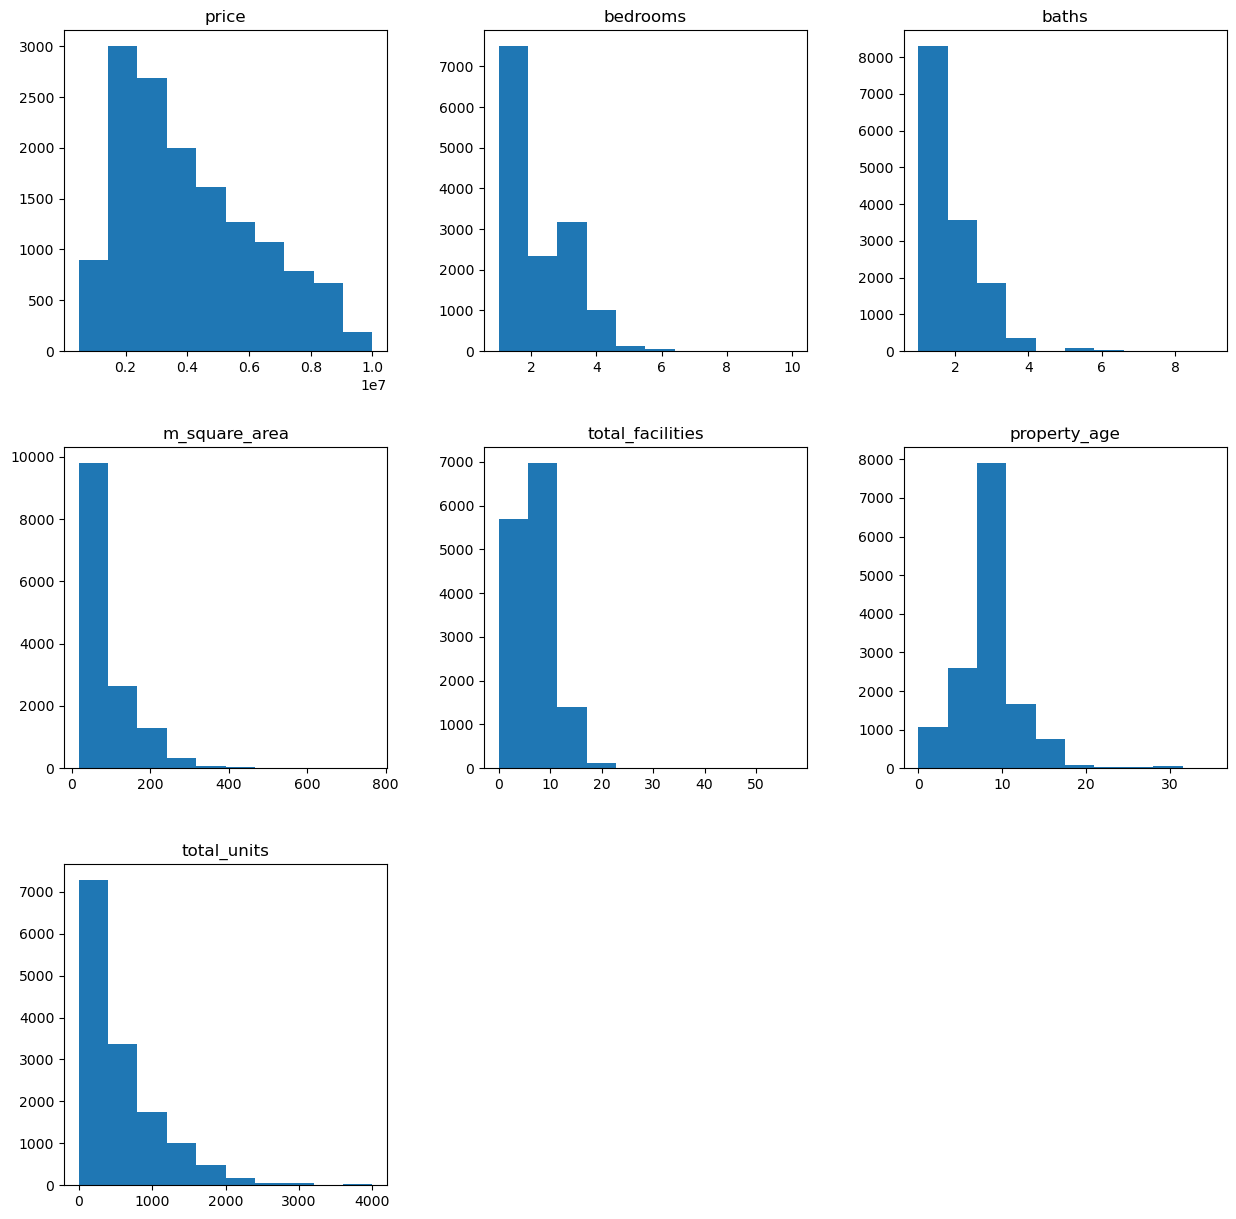

In [79]:
# check the normal histogram
numeric_cols = [col for col in c_train_df.columns if not (col.startswith('is_') or col.startswith('has_'))]
c_train_df[numeric_cols].hist(figsize=(15,15), grid=False);

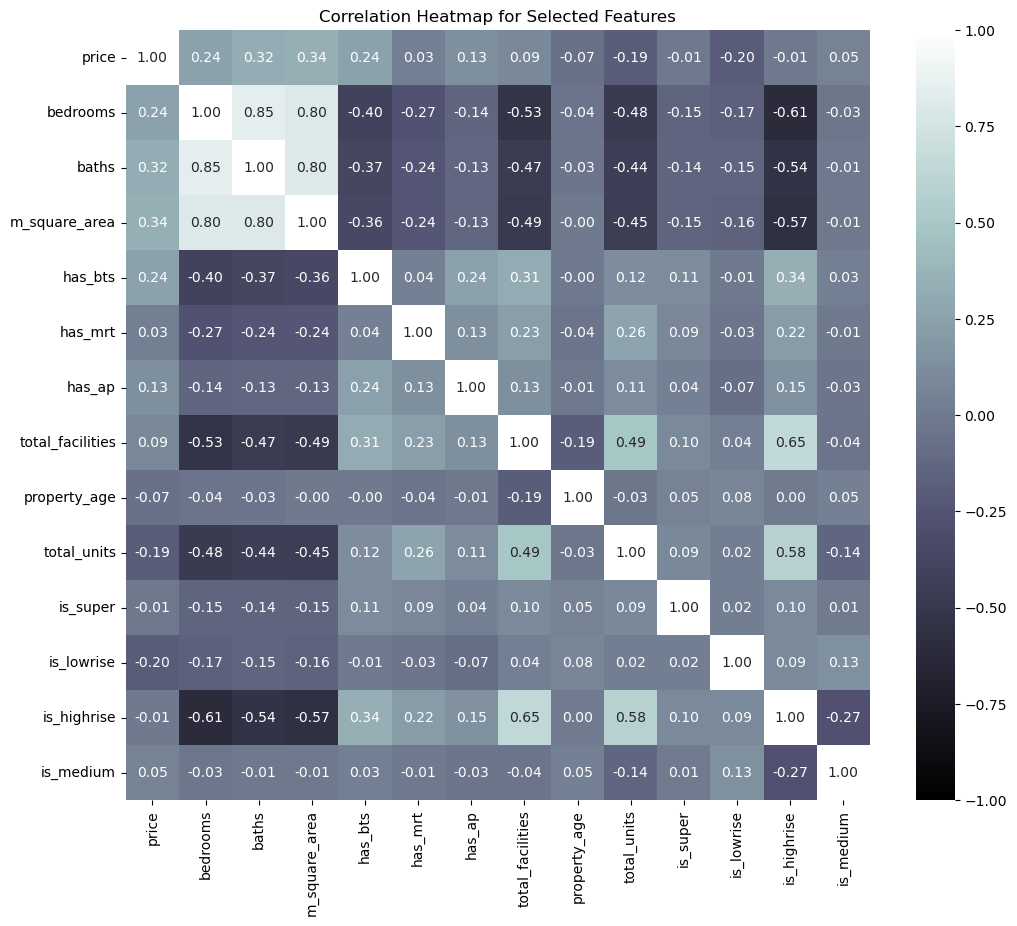

In [80]:
# Select the columns that interested and compute the correlation matrix
col_of_int =['price','bedrooms', 'baths', 'm_square_area', 'has_bts', 'has_mrt' , 'has_ap',
              'total_facilities','property_age','total_units', 'is_super','is_lowrise','is_highrise', 'is_medium']


corr_matrix = c_train_df[col_of_int].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='bone', fmt=".2f")
plt.yticks(rotation=0)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

# Modelling

#### train - dev split

In [83]:
train_df.columns

Index(['id', 'subdistrict', 'address', 'total_units', 'bedrooms', 'baths',
       'floor_area', 'floor_level', 'land_area', 'latitude',
       ...
       'is_lowrise', 'is_highrise', 'is_medium', 'm_square_area', 'has_car',
       'total_facilities', 'property_age', 'is_bus', 'is_shop', 'is_super'],
      dtype='object', length=113)

In [84]:
test_df.columns

Index(['id', 'subdistrict', 'address', 'total_units', 'bedrooms', 'baths',
       'floor_area', 'floor_level', 'land_area', 'latitude', 'longitude',
       'nearby_stations', 'nearby_station_distance', 'nearby_bus_stops',
       'nearby_supermarkets', 'nearby_shops', 'year_built', 'month_built',
       'facilities', 'has_bts', 'has_mrt', 'has_ap', 'district_bang_bo',
       'district_bang_bon', 'district_bang_bua_thong', 'district_bang_kapi',
       'district_bang_khae', 'district_bang_khen', 'district_bang_kho_laem',
       'district_bang_khun_thian', 'district_bang_kruai', 'district_bang_na',
       'district_bang_phlat', 'district_bang_phli', 'district_bang_rak',
       'district_bang_sao_thong', 'district_bang_sue', 'district_bang_yai',
       'district_bangkok_noi', 'district_bangkok_yai', 'district_bueng_kum',
       'district_chatuchak', 'district_chom_thong', 'district_din_daeng',
       'district_don_mueang', 'district_huai_khwang', 'district_khan_na_yao',
       'district_khl

In [85]:
#Define feature columns from train_df
X = train_df[['province_nonthaburi',
              'province_samut_prakan','bedrooms', 'baths', 'm_square_area', 'has_bts', 'has_mrt' , 'has_ap',
              'has_car','total_facilities', 'property_type_detached_house', 'property_type_townhouse',
               'property_age','total_units','is_bus',
               'is_shop', 'is_super','is_lowrise',
                'is_highrise', 'is_medium','district_bang_bo',
               'district_bang_bon', 'district_bang_bua_thong', 'district_bang_kapi',
               'district_bang_khae', 'district_bang_khen', 'district_bang_kho_laem',
               'district_bang_khun_thian', 'district_bang_kruai', 'district_bang_na',
               'district_bang_phlat', 'district_bang_phli', 'district_bang_rak',
               'district_bang_sao_thong', 'district_bang_sue', 'district_bang_yai',
               'district_bangkok_noi', 'district_bangkok_yai', 'district_bueng_kum',
               'district_chatuchak', 'district_chom_thong', 'district_din_daeng',
               'district_don_mueang', 'district_huai_khwang', 'district_khan_na_yao',
               'district_khlong_sam_wa', 'district_khlong_san', 'district_khlong_toei',
               'district_lak_si', 'district_lat_krabang', 'district_lat_phrao',
               'district_min_buri', 'district_mueang_nonthaburi',
               'district_mueang_samut_prakan', 'district_nong_chok',
               'district_nong_khaem', 'district_pak_kret', 'district_pathum_wan',
               'district_phasi_charoen', 'district_phaya_thai',
               'district_phra_khanong','district_phra_pradaeng',
               'district_phra_samut_jadee', 'district_prawet', 'district_rat_burana',
               'district_ratchathewi', 'district_sai_mai', 'district_sai_noi',
               'district_saphan_sung', 'district_sathon', 'district_suan_luang',
               'district_taling_chan', 'district_thawi_watthana', 'district_thon_buri',
               'district_thung_khru', 'district_wang_thonglang', 'district_watthana',
               'district_yan_nawa']]  # DataFrame

In [86]:
#Define robust feature columns from train_df
X_robust = train_df[['province_nonthaburi',
              'province_samut_prakan','bedrooms', 'baths', 'm_square_area', 'has_bts', 'has_mrt' , 'has_ap',
              'has_car','total_facilities', 'property_type_detached_house', 'property_type_townhouse',
               'property_age','total_units','is_bus',
               'is_shop', 'is_super','is_lowrise',
                'is_highrise', 'is_medium','district_bang_bo',
               'district_bang_bon', 'district_bang_bua_thong', 'district_bang_kapi',
               'district_bang_khae', 'district_bang_khen', 'district_bang_kho_laem',
               'district_bang_khun_thian', 'district_bang_kruai', 'district_bang_na',
               'district_bang_phlat', 'district_bang_phli', 'district_bang_rak',
               'district_bang_sao_thong', 'district_bang_sue', 'district_bang_yai',
               'district_bangkok_noi', 'district_bangkok_yai', 'district_bueng_kum',
               'district_chatuchak', 'district_chom_thong', 'district_din_daeng',
               'district_don_mueang', 'district_huai_khwang', 'district_khan_na_yao',
               'district_khlong_sam_wa', 'district_khlong_san', 'district_khlong_toei',
               'district_lak_si', 'district_lat_krabang', 'district_lat_phrao',
               'district_min_buri', 'district_mueang_nonthaburi',
               'district_mueang_samut_prakan', 'district_nong_chok',
               'district_nong_khaem', 'district_pak_kret', 'district_pathum_wan',
               'district_phasi_charoen', 'district_phaya_thai',
               'district_phra_khanong','district_phra_pradaeng',
               'district_phra_samut_jadee', 'district_prawet', 'district_rat_burana',
               'district_ratchathewi', 'district_sai_mai', 'district_sai_noi',
               'district_saphan_sung', 'district_sathon', 'district_suan_luang',
               'district_taling_chan', 'district_thawi_watthana', 'district_thon_buri',
               'district_thung_khru', 'district_wang_thonglang', 'district_watthana',
               'district_yan_nawa']]

In [87]:
X.columns

Index(['province_nonthaburi', 'province_samut_prakan', 'bedrooms', 'baths',
       'm_square_area', 'has_bts', 'has_mrt', 'has_ap', 'has_car',
       'total_facilities', 'property_type_detached_house',
       'property_type_townhouse', 'property_age', 'total_units', 'is_bus',
       'is_shop', 'is_super', 'is_lowrise', 'is_highrise', 'is_medium',
       'district_bang_bo', 'district_bang_bon', 'district_bang_bua_thong',
       'district_bang_kapi', 'district_bang_khae', 'district_bang_khen',
       'district_bang_kho_laem', 'district_bang_khun_thian',
       'district_bang_kruai', 'district_bang_na', 'district_bang_phlat',
       'district_bang_phli', 'district_bang_rak', 'district_bang_sao_thong',
       'district_bang_sue', 'district_bang_yai', 'district_bangkok_noi',
       'district_bangkok_yai', 'district_bueng_kum', 'district_chatuchak',
       'district_chom_thong', 'district_din_daeng', 'district_don_mueang',
       'district_huai_khwang', 'district_khan_na_yao',
       'distri

In [282]:
X.shape

(14202, 78)

In [88]:
# define the target
y = train_df['price']


#Run train and test split 
X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(10651, 78)
(10651,)
(3551, 78)
(3551,)


In [89]:
#LinearRegression

#Instantiate a model

lr = sklearn.linear_model.LinearRegression()

# Fit or train model on only the training data
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
print(lr.intercept_)
print(lr.coef_)

-58724813570588.266
[ 1.35676019e+10  2.24640609e+15  4.06886220e+05  8.16759929e+05
  8.69022584e+03  5.60674689e+05  5.41527209e+05  3.83890724e+05
 -1.64294910e+04  5.81470766e+04  4.37983365e+05 -9.78411844e+05
 -4.71854881e+04 -3.80430010e+02  1.29254135e+05  1.06703062e+13
 -1.42787962e+05 -4.48153739e+05  4.76034796e+05  4.63663264e+05
 -2.19835159e+15  4.80545070e+13  4.80409392e+13  4.80545082e+13
  4.80545075e+13  4.80545077e+13  4.80545104e+13  4.80545074e+13
  4.80409402e+13  4.80545085e+13  4.80545084e+13 -2.19835159e+15
  4.80545116e+13 -2.19835159e+15  4.80545083e+13  4.80409396e+13
  4.80545080e+13  4.80545084e+13  4.80545078e+13  4.80545090e+13
  4.80545076e+13  4.80545090e+13  4.80545079e+13  4.80545093e+13
  4.80545079e+13  4.80545072e+13  4.80545101e+13  4.80545106e+13
  4.80545083e+13  4.80545077e+13  4.80545086e+13  4.80545076e+13
  4.80409401e+13 -2.19835159e+15  4.80545059e+13  4.80545071e+13
  4.80409403e+13  4.80545117e+13  4.80545077e+13  4.80545099e+13
  4.8

In [91]:
list(zip(train_df, lr.coef_))

[('id', 13567601873.524603),
 ('subdistrict', 2246406093101387.8),
 ('address', 406886.2197737098),
 ('total_units', 816759.9286117554),
 ('bedrooms', 8690.225843429565),
 ('baths', 560674.6892137527),
 ('floor_area', 541527.2094726562),
 ('floor_level', 383890.7238044739),
 ('land_area', -16429.490953445435),
 ('latitude', 58147.0766210556),
 ('longitude', 437983.36539936066),
 ('nearby_stations', -978411.8440542221),
 ('nearby_station_distance', -47185.48806428909),
 ('nearby_bus_stops', -380.43000984191895),
 ('nearby_supermarkets', 129254.13542032242),
 ('nearby_shops', 10670306187383.312),
 ('year_built', -142787.96202206612),
 ('month_built', -448153.73883652687),
 ('facilities', 476034.7962821722),
 ('price', 463663.2639057636),
 ('has_bts', -2198351585766651.8),
 ('bts_station_one', 48054506951333.305),
 ('distance_one', 48040939156500.016),
 ('bts_station_two', 48054508160852.984),
 ('distance_two', 48054507482079.22),
 ('bts_station_three', 48054507694030.81),
 ('distance_thr

In [92]:
# Train score
print(f'Train R-squared score: {lr.score(X_train, y_train)}')
# Test score
print(f'Test R-squared score: {lr.score(X_dev, y_dev)}')

Train R-squared score: 0.6583384426340685
Test R-squared score: 0.6514017138523032


In [93]:
pd.Series(lr.coef_, index=X.columns)

province_nonthaburi        1.356760e+10
province_samut_prakan      2.246406e+15
bedrooms                   4.068862e+05
baths                      8.167599e+05
m_square_area              8.690226e+03
                               ...     
district_thon_buri         4.805451e+13
district_thung_khru        4.805451e+13
district_wang_thonglang    4.805451e+13
district_watthana          4.805451e+13
district_yan_nawa          4.805451e+13
Length: 78, dtype: float64

In [94]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient']) 

,Coefficient
province_nonthaburi,1.356760e+10
province_samut_prakan,2.246406e+15
bedrooms,4.068862e+05
baths,8.167599e+05
m_square_area,8.690226e+03
...,...
district_thon_buri,4.805451e+13
district_thung_khru,4.805451e+13
district_wang_thonglang,4.805451e+13
district_watthana,4.805451e+13


In [95]:
X_train.tail()

,province_nonthaburi,province_samut_prakan,bedrooms,baths,m_square_area,has_bts,has_mrt,has_ap,has_car,total_facilities,...,district_saphan_sung,district_sathon,district_suan_luang,district_taling_chan,district_thawi_watthana,district_thon_buri,district_thung_khru,district_wang_thonglang,district_watthana,district_yan_nawa
5214,False,False,1.0,1.0,33,0,0,0,1,6,...,False,False,False,False,False,False,False,False,False,False
13483,False,False,2.0,1.0,70,1,1,0,0,6,...,False,False,False,False,False,False,False,False,False,False
5413,False,False,3.0,3.0,280,0,0,0,0,6,...,False,False,False,False,False,False,True,False,False,False
863,False,False,1.0,1.0,40,1,0,0,1,8,...,False,False,False,False,False,False,False,False,True,False
7305,False,False,1.0,1.0,33,1,1,1,1,13,...,False,False,False,False,False,False,False,False,False,False


In [96]:
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.6517880925818617

In [97]:
#predict Y from x values
y_preds = lr.predict(X)

In [98]:
y_preds[0]

7159057.7421875

In [99]:
X.head(1)

,province_nonthaburi,province_samut_prakan,bedrooms,baths,m_square_area,has_bts,has_mrt,has_ap,has_car,total_facilities,...,district_saphan_sung,district_sathon,district_suan_luang,district_taling_chan,district_thawi_watthana,district_thon_buri,district_thung_khru,district_wang_thonglang,district_watthana,district_yan_nawa
0,False,False,2.0,2.0,66,1,0,0,1,6,...,False,False,False,False,False,False,False,False,True,False


In [100]:
residuals = y - y_preds
residuals[0:5]

0    1.340942e+06
1   -4.398598e+05
2    8.084510e+05
3    3.208519e+06
4   -9.386228e+05
Name: price, dtype: float64

In [101]:
residuals.mean()

-947.2653229958809

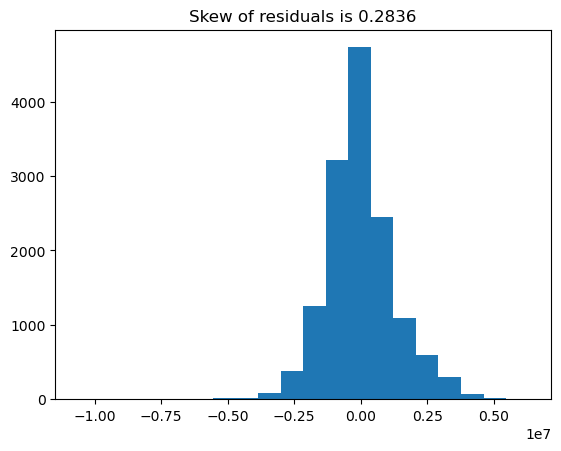

In [102]:
plt.hist(residuals, bins=20)

plt.title(f"Skew of residuals is {pd.Series(residuals).skew():.4f}")
plt.show()

In [103]:
pd.Series(residuals).skew()


0.2835605840309483

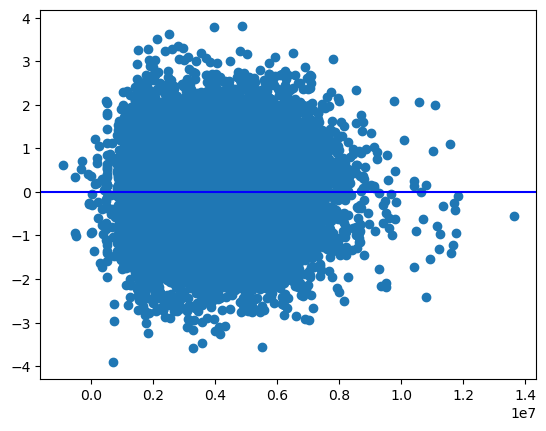

array([ 1.15562534,  0.14300576, -1.00413626, ..., -0.18881147,
       -0.37848654,  0.02702175])

In [104]:
errors_fake = np.random.randn(train_df.shape[0])
plt.scatter(y_preds, errors_fake)
plt.axhline(0, color='blue')
plt.show()
errors_fake

In [105]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y, y_preds):.4f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y, y_preds):.4f}")
print(f"Root Mean Squared Error: {metrics.root_mean_squared_error(y, y_preds):.4f}")

Mean Absolute Error: 948415.4957
Mean Squared Error: 1631684219838.0178
Root Mean Squared Error: 1277373.9546


In [106]:
#OLS Model


from sklearn.metrics import r2_score


X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X,y, random_state=42)

ols = sklearn.linear_model.LinearRegression()
ols.fit(X_train, y_train)

pred_train_ols = ols.predict(X_train_ols)
pred_test_ols = ols.predict(X_test_ols)

print("OLS R² Score of train :", r2_score(y_train_ols, pred_train_ols))
print("OLS  R² Score of test:", r2_score(y_test_ols, pred_test_ols))
print("OLS RMSE of train:", metrics.root_mean_squared_error(y_train_ols, pred_train_ols))
print("OLS RMSE of test:", metrics.root_mean_squared_error(y_test_ols, pred_test_ols))

OLS R² Score of train : 0.6583384426340685
OLS  R² Score of test: 0.6514017138523032
OLS RMSE of train: 1270976.5771613445
OLS RMSE of test: 1296373.1400359487


## LASSO MODEL

In [108]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
ls = Lasso(alpha=1, random_state=42)

ls.fit(X_train, y_train) 

ls_pred_train = ls.predict(X_train)
ls_pred_dev = ls.predict(X_dev)

print("R² Score of train:", r2_score(y_train, ls_pred_train))
print("R² Score of test:", r2_score(y_dev, ls_pred_dev))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_dev, ls_pred_dev))
print("Mean Squared Error:", metrics.mean_squared_error(y_dev, ls_pred_dev))
print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_dev, ls_pred_dev))


R² Score of train: 0.6583384786824309
R² Score of test: 0.6514086098060317
Mean Absolute Error: 960689.3417881991
Mean Squared Error: 1680550072992.1604
Root Mean Squared Error: 1296360.3175784734


In [109]:
#Prepossing by SC

In [110]:
sc = StandardScaler()


X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_dev_scaled = pd.DataFrame(sc.transform(X_dev), columns=X_dev.columns, index=X_dev.index)

ls_sc = Lasso(alpha=1, random_state=42)
ls_sc.fit(X_train_scaled, y_train)

ls_sc_pred_train = ls_sc.predict(X_train_scaled)
ls_sc_pred_dev = ls_sc.predict(X_dev_scaled)


print("R² Score of train:", r2_score(y_train, ls_sc_pred_train))
print("R² Score of test:", r2_score(y_dev, ls_sc_pred_dev))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_dev, ls_sc_pred_dev))
print("Mean Squared Error:", metrics.mean_squared_error(y_dev, ls_sc_pred_dev))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_dev, ls_sc_pred_dev)))

R² Score of train: 0.6583384812060724
R² Score of test: 0.6514093411122919
Mean Absolute Error: 960686.0286499569
Mean Squared Error: 1680546547383.601
Root Mean Squared Error: 1296358.957767331


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_dev_scaled = pd.DataFrame(scaler.transform(X_dev), columns=X_dev.columns, index=X_dev.index)


ls_mm_sc = Lasso(alpha=1, random_state=42)
ls_mm_sc.fit(X_train_scaled, y_train)


ls_mm_sc_pred_train = ls_mm_sc.predict(X_train_scaled)
ls_mm_sc_pred_dev = ls_mm_sc.predict(X_dev_scaled)

print("R² Score of train:", r2_score(y_train, ls_mm_sc_pred_train))
print("R² Score of test:", r2_score(y_dev, ls_mm_sc_pred_dev))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_dev, ls_mm_sc_pred_dev))
print("Mean Squared Error:", metrics.mean_squared_error(y_dev, ls_mm_sc_pred_dev))
print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_dev, ls_mm_sc_pred_dev))

R² Score of train: 0.6583384786027077
R² Score of test: 0.6514077704142207
Mean Absolute Error: 960691.0415734751
Mean Squared Error: 1680554119678.363
Root Mean Squared Error: 1296361.878365128


In [112]:
y_robust = train_df['price']

(X_robust_rc, X_dev_rc, y_robust_rc, y_dev_rc) = sklearn.model_selection.train_test_split(X_robust,y_robust)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X_robust, y_robust)

ransac_pred_train = ransac.predict(X_robust_rc)
ransac_pred_dev = ransac.predict(X_dev_rc)

print("R² Score of train:", r2_score(y_robust_rc, ransac_pred_train))
print("R² Score of test:", r2_score(y_dev_rc, ransac_pred_dev))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_dev_rc, ransac_pred_dev))
print("Mean Squared Error:", metrics.mean_squared_error(y_dev_rc, ransac_pred_dev))
print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_dev_rc, ransac_pred_dev))


R² Score of train: 0.5678319081874137
R² Score of test: 0.5600879627705746
Mean Absolute Error: 1067241.3973792593
Mean Squared Error: 2109444500544.6538
Root Mean Squared Error: 1452392.681248654


# EDA from Model

In [370]:
# select only the values of interest
coefficients = ls.coef_
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# specific_property_types 
specific_property_types = ['property_type_townhouse', 'property_type_detached_house']  
property_features = coef_df[coef_df['Feature'].isin(specific_property_types)]

# specific_provinces
specific_provinces = ['province_nonthaburi', 'province_samut_prakan']  
province_features = coef_df[coef_df['Feature'].isin(specific_provinces)]

# specific_mass_transportation 
specific_features_of_interest = ['has_bts', 'has_mrt', 'has_ap']
features_of_interest = coef_df[coef_df['Feature'].isin(specific_features_of_interest)]

# find the top 5 of coef that aim to understand the result and move to analyst exclude the property type , provinces , mass transportation  

top_n = 5
top_features = coef_df.loc[~coef_df['Feature'].isin(specific_property_types + specific_provinces + specific_features_of_interest)]
top_features = top_features.reindex(top_features['Coefficient'].abs().nlargest(top_n).index)

combined_features = pd.concat([top_features, property_features, province_features, features_of_interest])

print(combined_features[['Feature', 'Coefficient']])


                         Feature   Coefficient
54            district_nong_chok -3.142013e+06
57           district_pathum_wan  2.633349e+06
32             district_bang_rak  2.478356e+06
74           district_thung_khru -2.162548e+06
21             district_bang_bon -2.120326e+06
55           district_nong_khaem -1.952086e+06
10  property_type_detached_house  4.376041e+05
11       property_type_townhouse -9.787569e+05
0            province_nonthaburi -9.563416e+05
1          province_samut_prakan -1.149837e+06
5                        has_bts  5.608104e+05
6                        has_mrt  5.414304e+05
7                         has_ap  3.836854e+05


In [286]:
list(coef_df)

                    Feature   Coefficient
0       province_nonthaburi -9.563416e+05
1     province_samut_prakan -1.149837e+06
2                  bedrooms  4.070509e+05
3                     baths  8.168129e+05
4             m_square_area  8.690723e+03
..                      ...           ...
73       district_thon_buri -7.337028e+05
74      district_thung_khru -2.162548e+06
75  district_wang_thonglang -5.476295e+05
76        district_watthana  1.892671e+06
77        district_yan_nawa  4.400003e+05

[78 rows x 2 columns]


In [115]:
#specific_condo_type to analyst the type of condo 
specific_condo_type = ['is_lowrise','is_highrise', 'is_medium']  
condo_type_features = coef_df[coef_df['Feature'].isin(specific_condo_type)]
combined_features = pd.concat([condo_type_features])

print(combined_features[['Feature', 'Coefficient']])

        Feature    Coefficient
17   is_lowrise -448174.072275
18  is_highrise  476024.657904
19    is_medium  463644.401939


In [386]:
# analyst the districts 
district_features = coef_df[coef_df['Feature'].str.startswith('district_')]

positive_districts = district_features[district_features['Coefficient'] > 0]
negative_districts = district_features[district_features['Coefficient'] < 0]
# top_positive 
top_positive_districts = positive_districts.reindex(positive_districts['Coefficient'].nlargest(15).index)
#top negative
top_negative_districts = negative_districts.reindex(negative_districts['Coefficient'].nsmallest(10).index)

print("Top 5 Positive District Coefficients:")
print(top_positive_districts[['Feature', 'Coefficient']])


print("\nTop 5 Negative District Coefficients:")
print(top_negative_districts[['Feature', 'Coefficient']])

Top 5 Positive District Coefficients:
                   Feature   Coefficient
57     district_pathum_wan  2.633349e+06
32       district_bang_rak  2.478356e+06
76       district_watthana  1.892671e+06
69         district_sathon  1.721046e+06
47    district_khlong_toei  1.535929e+06
65    district_ratchathewi  1.356716e+06
26  district_bang_kho_laem  1.354186e+06
46     district_khlong_san  1.023305e+06
59     district_phaya_thai  8.292036e+05
77       district_yan_nawa  4.400003e+05
60   district_phra_khanong  2.586528e+05
43    district_huai_khwang  2.317293e+05
61  district_phra_pradaeng  8.145981e+04

Top 5 Negative District Coefficients:
                     Feature   Coefficient
54        district_nong_chok -3.142013e+06
74       district_thung_khru -2.162548e+06
21         district_bang_bon -2.120326e+06
55       district_nong_khaem -1.952086e+06
45    district_khlong_sam_wa -1.886123e+06
67          district_sai_noi -1.830878e+06
27  district_bang_khun_thian -1.645283e+06
68   

In [ ]:
#https://stackoverflow.com/questions/53747298/how-to-format-axis-tick-labels-from-number-to-thousands-or-millions-125-436-to

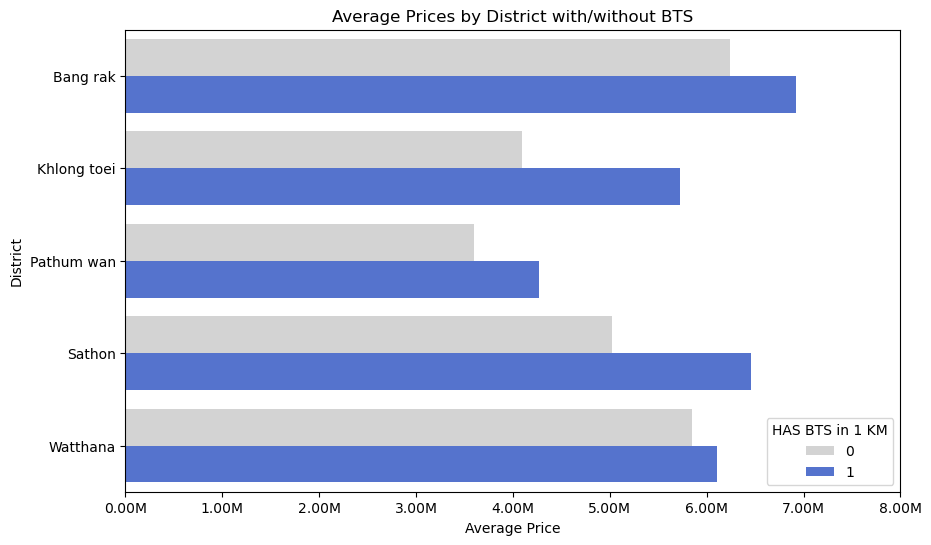

In [451]:
# plot the graph to analyst under the district with BTS 

filtered_df = c_train_df[['price', 'has_bts', 'district_pathum_wan', 'district_bang_rak', 
                           'district_watthana', 'district_sathon', 'district_khlong_toei']]


filtered_df = filtered_df.assign(District=lambda x: x[['district_pathum_wan', 'district_bang_rak', 
                                                       'district_watthana', 'district_sathon', 
                                                       'district_khlong_toei']].idxmax(axis=1))
DD_names = {
    'district_pathum_wan': 'Pathum wan',
    'district_bang_rak': 'Bang rak',
    'district_watthana': 'Watthana',
    'district_sathon': 'Sathon',
    'district_khlong_toei': 'Khlong toei'
}

filtered_df['District'] = filtered_df['District'].replace(DD_names)

average_prices = filtered_df.groupby(['District', 'has_bts']).agg({'price': 'mean'}).reset_index()


plt.figure(figsize=(10, 6))
palette = {1: 'royalblue', 0: 'lightgray'}
g = sns.barplot(data=average_prices, x='price', y='District', hue='has_bts', palette=palette)

plt.title('Average Prices by District with/without BTS')
plt.legend(title='BTS Availability', labels=['No BTS', 'Has BTS'])

plt.ylabel('District')
plt.xlabel('Average Price')
xticks = g.get_xticks()
xlabels = ['{:,.2f}'.format(x) + 'M' for x in g.get_xticks()/1_000_000]
g.set_xticks(xticks) 
g.set_xticklabels(xlabels)

plt.legend(title='HAS BTS in 1 KM')
plt.savefig('Img/bts_availability.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#https://stackoverflow.com/questions/53747298/how-to-format-axis-tick-labels-from-number-to-thousands-or-millions-125-436-to

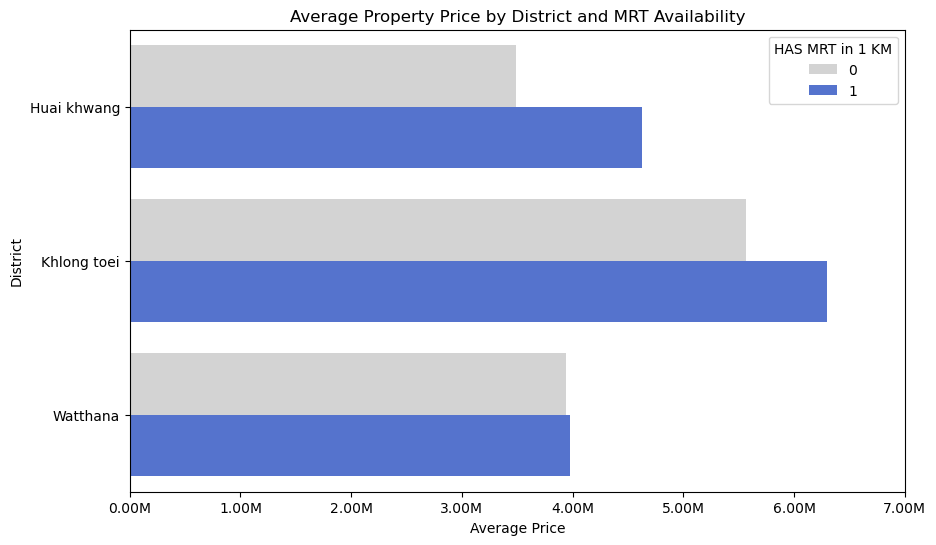

In [449]:
# plot the graph to analyst under the district with MRT 
filtered_df = c_train_df[['price', 'has_mrt','district_watthana', 
                          'district_huai_khwang', 'district_khlong_toei']]


filtered_df = filtered_df.assign(District=lambda x: x[[
                                                       'district_watthana', 'district_huai_khwang', 
                                                       'district_khlong_toei']].idxmax(axis=1))

DD_names = {
    'district_huai_khwang': 'Huai khwang',
    'district_watthana': 'Watthana',
    'district_khlong_toei': 'Khlong toei'
}

filtered_df['District'] = filtered_df['District'].replace(DD_names)

average_prices = filtered_df.groupby(['District', 'has_mrt']).agg({'price': 'mean'}).reset_index()



plt.figure(figsize=(10, 6))
palette = {1: 'royalblue', 0: 'lightgray'}
g = sns.barplot(data=average_prices, x='price', y='District', hue='has_mrt', palette=palette)

plt.title('Average Property Price by District and MRT Availability')
plt.xlabel('Average Price')
xticks = g.get_xticks()
xlabels = ['{:,.2f}'.format(x) + 'M' for x in g.get_xticks()/1_000_000]
g.set_xticks(xticks) 
g.set_xticklabels(xlabels)



plt.legend(title='HAS MRT in 1 KM')
plt.savefig('Img/mrt_availability.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
# Find the maximum number of total facilities
max_facilities = c_train_df['total_facilities'].max()

max_facilities_records = c_train_df[c_train_df['total_facilities'] == max_facilities]


max_facilities_records

,price,province_nonthaburi,province_samut_prakan,bedrooms,baths,m_square_area,has_bts,has_mrt,has_ap,has_car,...,district_saphan_sung,district_sathon,district_suan_luang,district_taling_chan,district_thawi_watthana,district_thon_buri,district_thung_khru,district_wang_thonglang,district_watthana,district_yan_nawa
3895,4999000,False,False,3.0,2.0,164,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


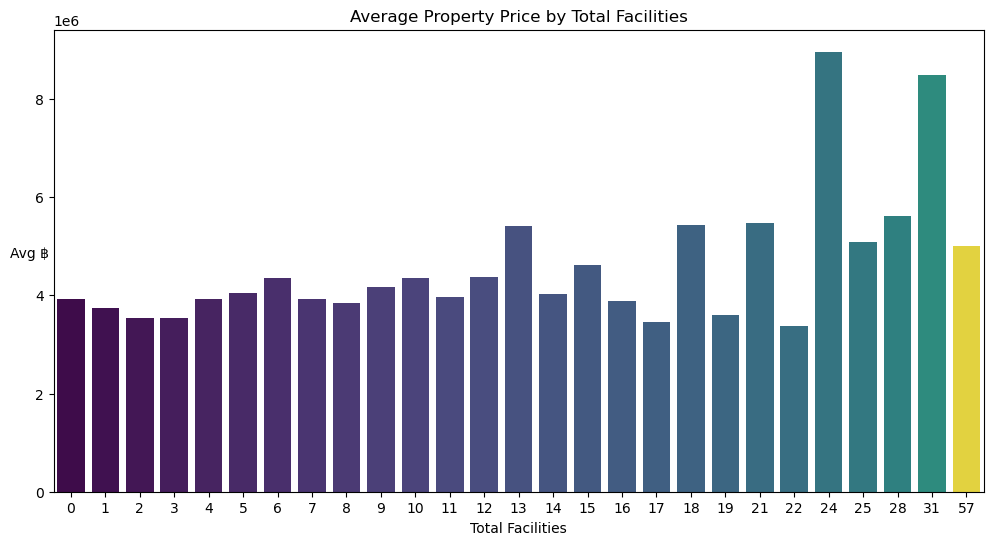

In [322]:
facilities_price_df = c_train_df.groupby('total_facilities')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=facilities_price_df, x='total_facilities', y='price', hue='total_facilities',legend=False, palette='viridis')
plt.title('Average Property Price by Total Facilities')
plt.xlabel('Total Facilities')
plt.ylabel('Avg ฿',rotation=360)
plt.savefig('Img/propertyfailities.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=0)
plt.show()

## RANSAC MODEL

# Prediction and Export

In [123]:

X_test = test_df[['province_nonthaburi',
              'province_samut_prakan','bedrooms', 'baths', 'm_square_area', 'has_bts', 'has_mrt' , 'has_ap',
              'has_car','total_facilities', 'property_type_detached_house', 'property_type_townhouse',
               'property_age','total_units','is_bus',
               'is_shop', 'is_super','is_lowrise','is_highrise', 'is_medium','district_bang_bo',
               'district_bang_bon', 'district_bang_bua_thong', 'district_bang_kapi',
               'district_bang_khae', 'district_bang_khen', 'district_bang_kho_laem',
               'district_bang_khun_thian', 'district_bang_kruai', 'district_bang_na',
               'district_bang_phlat', 'district_bang_phli', 'district_bang_rak',
               'district_bang_sao_thong', 'district_bang_sue', 'district_bang_yai',
               'district_bangkok_noi', 'district_bangkok_yai', 'district_bueng_kum',
               'district_chatuchak', 'district_chom_thong', 'district_din_daeng',
               'district_don_mueang', 'district_huai_khwang', 'district_khan_na_yao',
               'district_khlong_sam_wa', 'district_khlong_san', 'district_khlong_toei',
               'district_lak_si', 'district_lat_krabang', 'district_lat_phrao',
               'district_min_buri', 'district_mueang_nonthaburi',
               'district_mueang_samut_prakan', 'district_nong_chok',
               'district_nong_khaem', 'district_pak_kret', 'district_pathum_wan',
               'district_phasi_charoen', 'district_phaya_thai',
               'district_phra_khanong','district_phra_pradaeng',
               'district_phra_samut_jadee', 'district_prawet', 'district_rat_burana',
               'district_ratchathewi', 'district_sai_mai', 'district_sai_noi',
               'district_saphan_sung', 'district_sathon', 'district_suan_luang',
               'district_taling_chan', 'district_thawi_watthana', 'district_thon_buri',
               'district_thung_khru', 'district_wang_thonglang', 'district_watthana',
               'district_yan_nawa']]

In [124]:
X_test.shape

(2500, 78)

In [125]:
X_test_ols.shape

(3551, 78)

In [126]:
set(X_test)-set(X_train)

set()

In [127]:
X_test.isna().sum()

province_nonthaburi        0
province_samut_prakan      0
bedrooms                   0
baths                      0
m_square_area              0
                          ..
district_thon_buri         0
district_thung_khru        0
district_wang_thonglang    0
district_watthana          0
district_yan_nawa          0
Length: 78, dtype: int64

In [128]:
X_test_ols.isna().sum()

province_nonthaburi        0
province_samut_prakan      0
bedrooms                   0
baths                      0
m_square_area              0
                          ..
district_thon_buri         0
district_thung_khru        0
district_wang_thonglang    0
district_watthana          0
district_yan_nawa          0
Length: 78, dtype: int64

In [129]:
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

X_test.fillna(0,inplace=True)

In [130]:
X_test.isnull().sum()

province_nonthaburi        0
province_samut_prakan      0
bedrooms                   0
baths                      0
m_square_area              0
                          ..
district_thon_buri         0
district_thung_khru        0
district_wang_thonglang    0
district_watthana          0
district_yan_nawa          0
Length: 78, dtype: int64

In [131]:
X_test_ols = X_test

In [132]:
X_test_ls = X_test

In [133]:
y_test = lr.predict(X_test)

In [134]:
y_test.shape

(2500,)

In [135]:
y_test_ols = ols.predict(X_test_ols)
y_test_ols.shape

(2500,)

In [136]:
y_test_ls = ls.predict(X_test_ls)
y_test_ls.shape

(2500,)

In [137]:
# Scale X_test and retain feature names
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)

y_test_ls_sc = ls_sc.predict(X_test_scaled)
print("Test predictions shape:", y_test_ls.shape)

Test predictions shape: (2500,)


In [138]:

X_test_scaled_mm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


y_test_lsmm = ls_mm_sc.predict(X_test_scaled_mm)
print("Test predictions shape:", y_test_lsmm.shape)

Test predictions shape: (2500,)


In [139]:
# Export from LR
test_df['price'] = y_test
test_df[['id','price']].to_csv('Data/submission_kel.csv', index=False)

In [140]:
# export from ols
test_df['price'] = y_test_ols
test_df[['id','price']].to_csv('Data/submission_ols.csv', index=False)

In [141]:
# export from lasso
test_df['price'] = y_test_ls
test_df[['id','price']].to_csv('Data/submission_ls2.csv', index=False)

In [142]:
# export from lasso
test_df['price'] = y_test_ls_sc
test_df[['id','price']].to_csv('Data/submission_y_test_lssc.csv', index=False)

In [143]:
# export from lasso
test_df['price'] = y_test_lsmm
test_df[['id','price']].to_csv('Data/ssubmission_y_test_lsscmm.csv', index=False)

In [278]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10651, 78)
y_train shape: (10651,)
X_test shape: (2500, 78)
y_test shape: (2500,)
